<a href="https://colab.research.google.com/github/jmorrison57/xray-project/blob/main/ExplainabilityXRays.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## X-Ray Explainability

The following notebook is a clone of a covid x-ray [repo](https://github.com/aildnont/covid-cxr). The goal of this exercise is to experiment with explainability techniques the main one being Local Interpretable Model-Agnostic Explanations (i.e. LIME). LIME is a set of methods that do local linear analysis on data points. This modeling helps data analysts examine which features are most important in terms of making predictions. In the original [paper](https://arxiv.org/pdf/1602.04938.pdf) "Why should I trust you?" they have a very compelling example of predicting wolves and huskies - after running the LIME methods it was clear the model was simply detecting snow rather than using the features of the animals appearance. 

This methodolgy is model agnostic, but in this exercise we are also using images. The results could potentially be presented to a specialist that could verify that the model is doing what it was intended to do. The main goal here is to predict Pneumonia based on X-Ray images. The LIME results could point the specialist the exact area of the lungs that are exhibiting the illness.

In [ ]:
## Clone the repository
!git clone "https://github.com/jmorrison57/covid-cxr"

Cloning into 'covid-cxr'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 749 (delta 6), reused 12 (delta 4), pack-reused 734
Receiving objects: 100% (749/749), 4.29 MiB | 5.86 MiB/s, done.
Resolving deltas: 100% (400/400), done.


In [ ]:
## installs the requirements
% cd covid-cxr
% pip install -r requirements.txt

/content/covid-cxr
  Using cached https://files.pythonhosted.org/packages/c2/e9/f04cdcb7c917ad0c92dfab014e6ac027410a2eb071f7e59aabd2015afc99/botocore-1.0.0-py2.py3-none-any.whl
ERROR: s3transfer 0.3.3 has requirement botocore<2.0a.0,>=1.12.36, but you'll have botocore 1.0.0 which is incompatible.
ERROR: botocore 1.0.0 has requirement jmespath==0.7.1, but you'll have jmespath 0.10.0 which is incompatible.
ERROR: awscli 1.18.183 has requirement botocore==1.19.23, but you'll have botocore 1.0.0 which is incompatible.
ERROR: aiobotocore 1.1.2 has requirement botocore<1.17.45,>=1.17.44, but you'll have botocore 1.0.0 which is incompatible.
  Found existing installation: botocore 1.19.23
    Uninstalling botocore-1.19.23:
      Successfully uninstalled botocore-1.19.23


In [ ]:
## creates the directory for the data storage
% mkdir RAW_DATA
% cd RAW_DATA
% mkdir rsna-pneumonia-detection-challenge

/content/covid-cxr/RAW_DATA


In [ ]:
## clones various data sources
!git clone "https://github.com/ieee8023/covid-chestxray-dataset"
!git clone "https://github.com/agchung/Figure1-COVID-chestxray-dataset"

Cloning into 'covid-chestxray-dataset'...
remote: Enumerating objects: 3614, done.
remote: Total 3614 (delta 0), reused 0 (delta 0), pack-reused 3614
Receiving objects: 100% (3614/3614), 632.87 MiB | 32.50 MiB/s, done.
Resolving deltas: 100% (1433/1433), done.
Checking out files: 100% (1173/1173), done.
Cloning into 'Figure1-COVID-chestxray-dataset'...
remote: Enumerating objects: 112, done.
remote: Counting objects: 100% (112/112), done.
remote: Compressing objects: 100% (97/97), done.
remote: Total 112 (delta 28), reused 95 (delta 14), pack-reused 0
Receiving objects: 100% (112/112), 14.13 MiB | 16.04 MiB/s, done.
Resolving deltas: 100% (28/28), done.


## Data Config:

The larger Kaggle Dataset is stored in an Amazon s3 bucket.

The S3 connection utilizes the sdk called [boto3](https://boto3.amazonaws.com/v1/documentation/api/latest/guide/quickstart.html) and [s3fs](https://pypi.org/project/s3fs/) for the file system. Keep in mind if you use S3 you will need to add your own credentials. Additionally, the prepocessing script needs to be edited to make use of the libraries mentioned above.

In [ ]:
## installs the command line to add AWS credentials
! pip install awscli
! aws configure

In [ ]:
## moving back to the main directory
% cd ..

/content/covid-cxr


## Preprocess Datasets:

This script below creates the various dataframes for training, testing, and validation purposes. This particular script was altered to handle the S3 bucket and convert the images to jpg. Once the images were converted they were then stored in the RAW_DATA file.
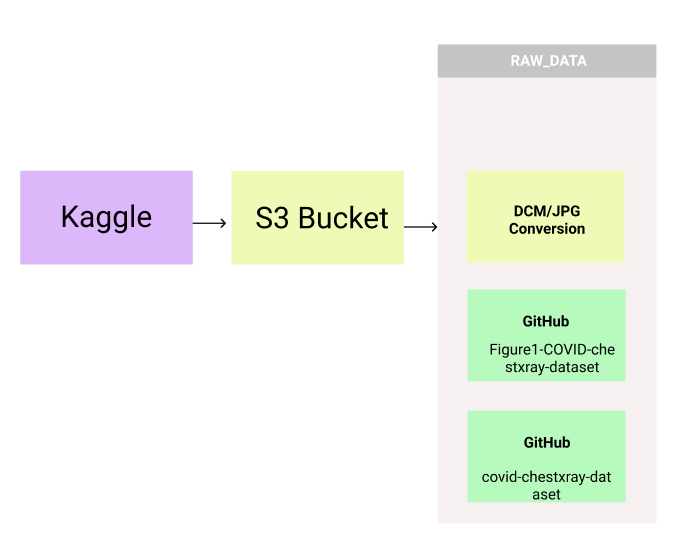

In [ ]:
## preprocess the data - creates dataframes - converts files
! python ./src/data/preprocess.py

./src/data/preprocess.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mila_other_views_df['label'] = 0                                       # Mila images with alternative diagnoses
./src/data/preprocess.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fig1_covid_views_df['label'] = 1                                       # Figure 1 images with COVID-19 diagnosis


## Run the model:

The train.py file runs the keras model. It appeared that on earlier training sessions the confusion matrix severely underperformed in regards to detecting a positive case of covid. This is probably a result of the imbalance in the data set. The config file was altered to use 'resnet50'. The class weights were hard coded.

In [ ]:
! python ./src/train.py

['/content/covid-cxr/src', '/env/python', '/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.6/dist-packages/IPython/extensions', '/content/covid-cxr/']
Found 1489 non-validated image filenames belonging to 2 classes.
Found 146 non-validated image filenames belonging to 2 classes.
Found 182 non-validated image filenames belonging to 2 classes.
Class weights:  [26.589285714285715, 0.07643737166324435]
2020-11-23 04:24:06.194615: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-11-23 04:24:06.227069: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1006] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-11-23 04:24:06.227734: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with

## Visualize the results in Tensorboard:

The inline TB feature was used to display the results. Confusion Matrix is located within the Images tab.

In [ ]:
import tensorflow as tf
from tensorflow import keras 
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
# % pip install tensorboard
% tensorboard --logdir logs

## Interpretability with LIME:

Two different visualization methods were used to examine the potential at risk areas of the lungs. One visualization method was a simple highlighting tool the other was a heatmap visualization. The underlying modeling uses the LIME package.

In [ ]:
! python ./src/interpretability/lime_explain.py
! python ./src/interpretability/gradcam.py

['/content/covid-cxr/src/interpretability', '/env/python', '/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/content/covid-cxr/src/../', '/usr/local/lib/python3.6/dist-packages/IPython/extensions', '/content/covid-cxr/src/']
Found 182 non-validated image filenames belonging to 2 classes.
2020-11-23 05:01:34.721762: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-11-23 05:01:34.753043: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1006] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-11-23 05:01:34.753707: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: Tesla V100-SXM2-16GB major: 7 minor: 0 memoryClockRate(GHz): 1.53
pciBusID: 0000:00:04.0
2020-11-23 05:01:34.754100:

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt

In [ ]:
entries = os.listdir('./documents/generated_images')
imgs = [f'./documents/generated_images/{x}' for x in entries if x[-3:] == 'png']
imgs.sort()
im_arr = [cv2.imread(i) for i in imgs]

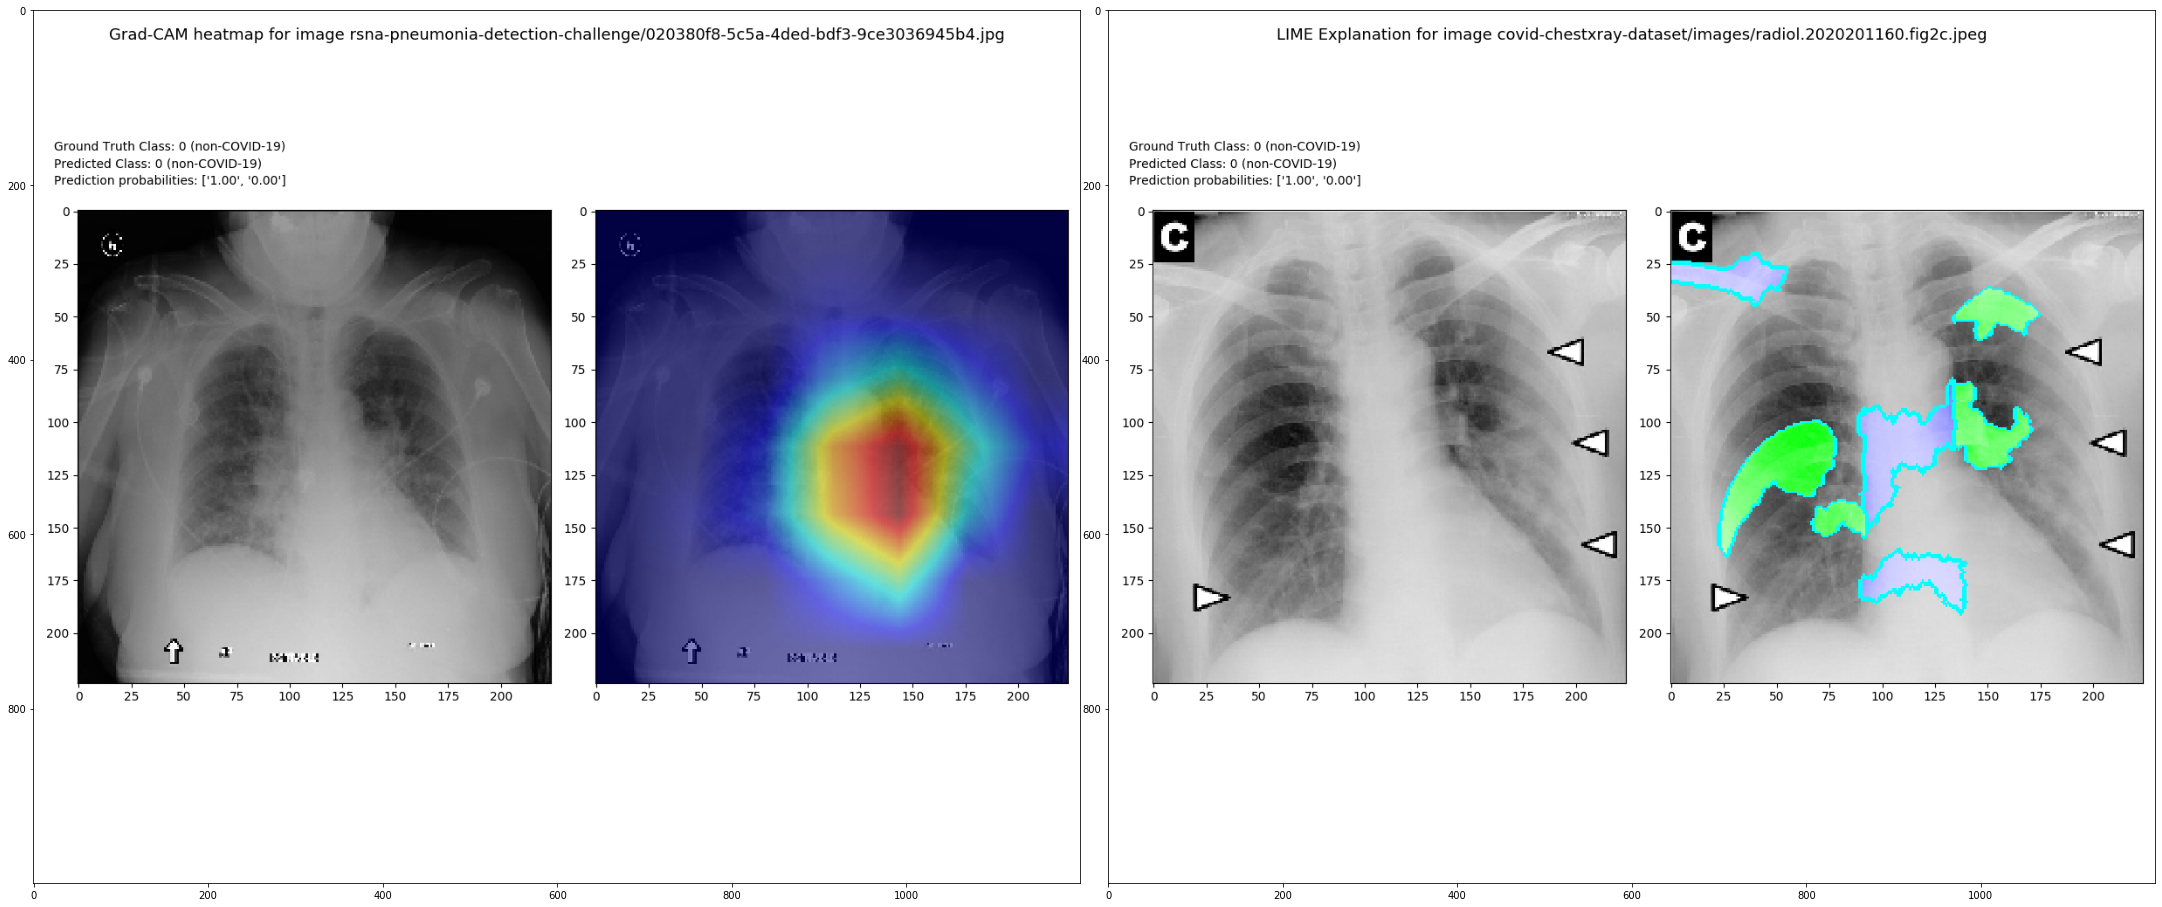

In [ ]:
fig, ax = plt.subplots(len(im_arr)//2,2,figsize=(30,50))
for i in range(len(im_arr)):
  plt.subplot(4,2,i+1)
  plt.imshow(im_arr[i])
plt.tight_layout()
plt.show()

## SHAP Analysis

In [ ]:
# !pip install tensorflow==2.1
# !pip install keras==2.1.6
! python ./src/interpretability/shap_explain.py

2020-11-23 07:04:38.767620: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer.so.6'; dlerror: libnvinfer.so.6: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2020-11-23 07:04:38.767708: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer_plugin.so.6'; dlerror: libnvinfer_plugin.so.6: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2020-11-23 07:04:38.767717: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:30] Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
['/content/covid-cxr/src/interpretability', '/env/python', '/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-pack